# Julia Basics

[![](https://github.com/stevengogogo/Julia-for-SciML/actions/workflows/ci.yml/badge.svg)](https://github.com/stevengogogo/Julia-for-SciML/actions/workflows/ci.yml) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stevengogogo/Julia-for-SciML/hands-on) 

> The result is also display at [tutorial page](https://stevengogogo.github.io/Julia-for-SciML/hands-on/julia_basics.html)

In this section, we are going to run julia with Jupyter. The purpose of this hands-on session is to give an overview about using Julia programming language and some essential feature about it. There are numerous learning materials listed in [the workshop appendix](https://stevengogogo.github.io/Julia-for-SciML/apx-resources.html#learning-materials).    

## Activate Environment

The `Pkg` is the package manager. In the beginning of the project, use `Pkg.activate` to locate the [`project.toml`](tutorial/project.toml) that lists required packages. Later on, `Pkg.insantiate` can install all packages.

In [1]:
using Pkg
Pkg.activate("tutorial")
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/Julia-for-SciML/hands-on/tutorial`


`]` is the shorthand to use `Pkg` api. The `] st` command shows the installed packages and the version. The specified version is listed in [manifest.toml](tutorial/manifest.toml). There are other useful commands:

1. Resolve conflicting packages: `] resolve`
2. Upgrade packages: `] up`
3. Precompilation: `] precompile`
4. Remove packages: `] rm packageA packageB`
5. Add packages: `] add packagesA packageB`

In [2]:
] st

Status `~/Documents/GitHub/Julia-for-SciML/hands-on/tutorial/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
  [0c46a032] DifferentialEquations v7.6.0
  [961ee093] ModelingToolkit v8.29.1
  [91a5bcdd] Plots v1.35.5
  [90137ffa] StaticArrays v1.5.9


## Import packages

There are two ways to import packages in Julia: `using` and `import`. 

```julia
using packageA
import packageB as B
```

When applying `using`, namespace prefix is not needed except the function is not exported from package or there is a conflict. On the other hand, `import` works just like Python's import, and namespace is required.


### precompilation

- During importing packages, precompilation will start and take some time to complete. Noted that it only takes time for the first run.


### Library
In this tutorial, we will need two packages:
- `BenchmarkTools.jl`: measure the allocation and time elapse of commands
- `DifferentialEquations`: Differential Equation solver

In [3]:
using BenchmarkTools
using StaticArrays
using DifferentialEquations
using Plots
using LinearAlgebra, Statistics

## Documentation

The `?` command can be used to search documentation of the function or variable

In [4]:
?@btime

```
@btime expression [other parameters...]
```

Similar to the `@time` macro included with Julia, this executes an expression, printing the time it took to execute and the memory allocated before returning the value of the expression.

Unlike `@time`, it uses the `@benchmark` macro, and accepts all of the same additional parameters as `@benchmark`.  The printed time is the *minimum* elapsed time measured during the benchmark.


## Multiple Dispatch

In [5]:
methods(exp)

# 22 methods for generic function "exp":
[1] exp(x::Union{Float16, Float32, Float64}) in Base.Math at special/exp.jl:326
[2] exp(A::StridedMatrix{var"#s885"} where var"#s885"<:Union{Float32, Float64, ComplexF32, ComplexF64}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:569
[3] exp(A::StridedMatrix{var"#s885"} where var"#s885"<:Union{Integer, Complex{<:Integer}}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:570
[4] exp(A::Hermitian{var"#s884", S} where {var"#s884"<:Complex, S<:(AbstractMatrix{<:var"#s884"})}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:731
[5] exp(A::Union{Hermitian{var"#s885", S}, Symmetric{var"#s885", S}} where {var"#s885"<:Real, S}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:727
[6] exp(D::Diagonal) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/diagonal.jl:674
[7] exp(L::SciMLBase.AbstractDiffEqLinearOperator) in SciMLBase at /Users/stevenchiu/.julia/packages/SciMLBase/pmQ12/src/operators/common_defaults.jl:66
[8] exp(L::SciMLBase.AbstractDiffEqLinearOperator, t) in SciMLBase at /Users/stevenchiu/.julia/packages/SciMLBase/pmQ12/src/operators/operators.jl:62
[9] exp(A::Transpose{<:Any, <:AbstractMatrix}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:572
[10] exp(A::Adjoint{<:Any, <:AbstractMatrix}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:571
[11] exp(c::AbstractGray) in ColorVectorSpace at /Users/stevenchiu/.julia/packages/ColorVectorSpace/bhkoO/src/ColorVectorSpace.jl:315
[12] exp(::Static.StaticFloat64{M}) where M in Static at /Users/stevenchiu/.julia/packages/Static/maaLb/src/Static.jl:457
[13] exp(z::DualNumbers.Dual) in DualNumbers at /Users/stevenchiu/.julia/packages/DualNumbers/5knFX/src/dual.jl:336
[14] exp(v::VectorizationBase.AbstractSIMD{W}) where W in VectorizationBase at /Users/stevenchiu/.julia/packages/VectorizationBase/MOxkH/src/special/exp.jl:623
[15] exp(d::ForwardDiff.Dual{T}) where T in ForwardDiff at /Users/stevenchiu/.julia/packages/ForwardDiff/pDtsf/src/dual.jl:238
[16] exp(A::StaticArray{Tuple{N, M}, T, 2} where {N, M, T}) in StaticArrays at /Users/stevenchiu/.julia/packages/StaticArrays/PUoe1/src/expm.jl:1
[17] exp(J::UniformScaling) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/uniformscaling.jl:173
[18] exp(x::BigFloat) in Base.MPFR at mpfr.jl:626
[19] exp(x::Real) in Base.Math at math.jl:1369
[20] exp(::Missing) in Base.Math at math.jl:1374
[21] exp(a::ComplexF16) in Base.Math at math.jl:1358
[22] exp(z::Complex) in Base at complex.jl:680

## Data Types

In [6]:
x = 1.

1.0

In [7]:
typeof(x)

Float64

In [8]:
s = "julia" 

"julia"

In [9]:
typeof(s)

String

In [10]:
c = 1 + 1im

1 + 1im

In [11]:
typeof(c)

Complex{Int64}

In [12]:
function add(a,b)
    return a+b
end

add(x,x)

2.0

## Referencing items

In [13]:
xs = [1,2,3,4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [14]:
xs[end]

4

In [15]:
xs[1] #julia index starts from 1

1

In [16]:
xs[end-1]

3

In [17]:
xs[1:2]

2-element Vector{Int64}:
 1
 2

In [18]:
function add(a::T,b::T) where T<: AbstractVector
    return a .+ b
end

add(xs,xs)

4-element Vector{Int64}:
 2
 4
 6
 8

In [19]:
add(xs,xs)

4-element Vector{Int64}:
 2
 4
 6
 8

In [20]:
xs .+ xs

4-element Vector{Int64}:
 2
 4
 6
 8

In [21]:
d = Dict("Name" => "Alex", "age"=> 12)

Dict{String, Any} with 2 entries:
  "Name" => "Alex"
  "age"  => 12

## Iterations

In [22]:
for x in xs
    println(x)
end

1
2
3
4


In [23]:
for i in eachindex(xs)
    println(xs[i])
end

1
2
3
4


In [24]:
?eachindex

search: eachindex



```
eachindex(A...)
```

Create an iterable object for visiting each index of an `AbstractArray` `A` in an efficient manner. For array types that have opted into fast linear indexing (like `Array`), this is simply the range `1:length(A)`. For other array types, return a specialized Cartesian range to efficiently index into the array with indices specified for every dimension. For other iterables, including strings and dictionaries, return an iterator object supporting arbitrary index types (e.g. unevenly spaced or non-integer indices).

If you supply more than one `AbstractArray` argument, `eachindex` will create an iterable object that is fast for all arguments (a [`UnitRange`](@ref) if all inputs have fast linear indexing, a [`CartesianIndices`](@ref) otherwise). If the arrays have different sizes and/or dimensionalities, a `DimensionMismatch` exception will be thrown.

# Examples

```jldoctest
julia> A = [1 2; 3 4];

julia> for i in eachindex(A) # linear indexing
           println(i)
       end
1
2
3
4

julia> for i in eachindex(view(A, 1:2, 1:1)) # Cartesian indexing
           println(i)
       end
CartesianIndex(1, 1)
CartesianIndex(2, 1)
```


## Composite Type and multiple dispatch

In [25]:
import Base.+

[Abstract type and concrete type](https://docs.julialang.org/en/v1/manual/types/)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Julia-number-type-hierarchy.svg/1920px-Julia-number-type-hierarchy.svg.png)
> Image from https://en.wikibooks.org/wiki/Introducing_Julia/Types

In [26]:
abstract type Coordinate end

struct Point1 <: Coordinate
    x
    y
end

In [27]:
# Recommended way
struct Point2{T} <: Coordinate
    x::T
    y::T
end

The custom type can be extended to existed function. Noted that `T` capture the parameter of the argument and it is constrained to the subtype of `Coordinate`. The approach is called parameter typing.

In [28]:
function +(a::T, b::T) where T<:Coordinate
   return T(a.x+b.x, a.y+b.y)
end

+ (generic function with 402 methods)

In [29]:
p0 = Point1(1,2)
p1 = Point1(2,3)

Point1(2, 3)

In [30]:
p0 + p1

Point1(3, 5)

In [31]:
@which +(p0,p1)

+(a::T, b::T) where T<:Coordinate in Main at In[28]:1

## Simulation and Plotting

**Plots.jl**

The `Plots.jl` provides similar pipeline like matplotlib. It also supports matplotlib backend to generate figures. Another data visualization system is [Makie.jl](https://docs.makie.org/stable/) that supports GPU plotting and is optimized by Julia.

*DifferentialEquations.jl*

This example uses DifferentialEqiations.jl to produce the time series data. The `!` in `lorenz!` function flags that `du` is mutated in the function call (call by reference).

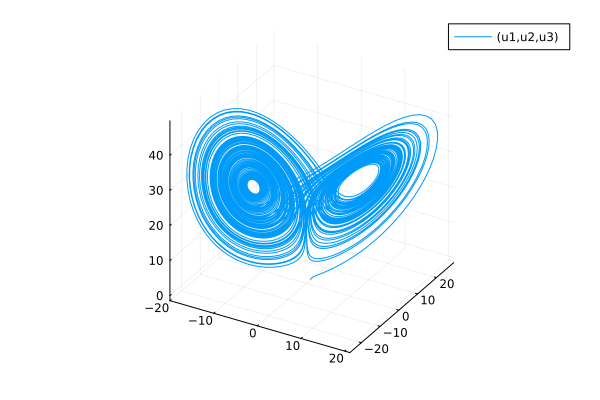

In [38]:
function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob)

plot(sol,idxs=(1,2,3))

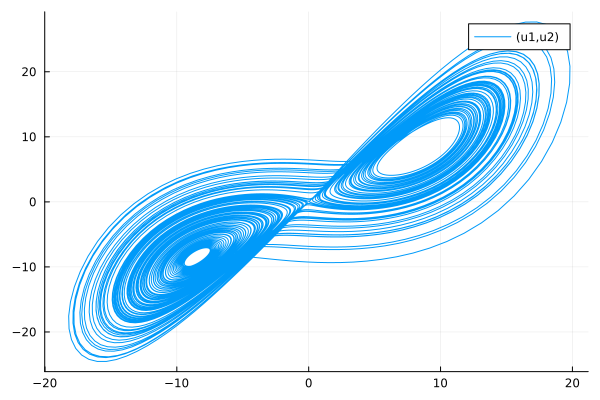

In [39]:
plot(sol,idxs=(1,2))

## Performance tips

Though Julia provides excellent design for producing fast code, there are still caveats that make code slower. *Memory allocation* and *type instability* are two major concerns when producing fast code. There are two powerful method to examine these problems

- `BenchmarkTools.@btime`: This macro acquires the sample mean of the runtime to examin the speed and memory allocation.
- `@code_warntype`: This can flag the type instability.
- [Other tools for profiling](https://docs.julialang.org/en/v1/manual/performance-tips/#tools)

from https://book.sciml.ai/notes/02/

In [40]:
?@btime

```
@btime expression [other parameters...]
```

Similar to the `@time` macro included with Julia, this executes an expression, printing the time it took to execute and the memory allocated before returning the value of the expression.

Unlike `@time`, it uses the `@benchmark` macro, and accepts all of the same additional parameters as `@benchmark`.  The printed time is the *minimum* elapsed time measured during the benchmark.


### Avoid Heap allocation

|Memory Type|
|---|
|Stack|
|Heap|

In [35]:
A = rand(100,100);
B = rand(100,100);
C = rand(100,100);
size(A)

(100, 100)

In [36]:
# Heap allocation
function inner_alloc!(C,A,B)
  for j in 1:100, i in 1:100
    val = [A[i,j] + B[i,j]]
    C[i,j] = val[1]
  end
end
@btime inner_alloc!(C,A,B)

  167.084 μs (10000 allocations: 625.00 KiB)


In [44]:
# Mutated function
function inner_noalloc!(C,A,B)
  for j in 1:100, i in 1:100
    val = A[i,j] + B[i,j]
    C[i,j] = val[1]
  end
end
@btime inner_noalloc!(C,A,B)

  4.619 μs (0 allocations: 0 bytes)


Question: Can we force an array to be stored at *stack*?
- Yes. Use [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl)

### Avoid type instability

In [50]:
function h(x,y)
  out = x + y
  rand() < 0.5 ? out : Float64(out)
end

@code_warntype h(2,5)

MethodInstance for h(::Int64, ::Int64)
  from h(x, y) in Main at In[50]:1
Arguments
  #self#::Core.Const(h)
  x::Int64
  y::Int64
Locals
  out::Int64
Body::Union{Float64, Int64}
1 ─      (out = x + y)
│   %2 = Main.rand()::Float64
│   %3 = (%2 < 0.5)::Bool
└──      goto #3 if not %3
2 ─      return out
3 ─ %6 = Main.Float64(out)::Float64
└──      return %6



It is also interesting to show that the following code is type stable.

In [51]:
function h(x,y)
  out = x + y
  3 < 0.5 ? out : Float64(out)
end

@code_warntype h(2,5)

MethodInstance for h(::Int64, ::Int64)
  from h(x, y) in Main at In[51]:1
Arguments
  #self#::Core.Const(h)
  x::Int64
  y::Int64
Locals
  out::Int64
Body::Float64
1 ─      (out = x + y)
│   %2 = (3 < 0.5)::Core.Const(false)
└──      goto #3 if not %2
2 ─      Core.Const(:(return out))
3 ┄ %5 = Main.Float64(out)::Float64
└──      return %5



### Other methods
- inbounds of for-loop
- inline
- SIMD (Single instruction, multiple data)

## Remarks

Julia is a high performance programming language. Noted that it is designed for generic programming. Instead of scientific machine learning, there are multiple interesting application such as agent-based modeling, optimization and  web design. Since it is a new language, the main purpose of these development is to out-compete the previous software. Performance is the key to untackle complex problems, and Julia is a way to focus on algorithmic design and also pursuing high performance computing at the same time.

## Advanced Learning
- Advanced topic and learning materials are located at [the tutorial appendix](https://stevengogogo.github.io/Julia-for-SciML/apx-resources.html).